In [1]:
#@title **Instalación de librerias**
!pip install trimesh pyrender matplotlib --quiet #Nueva
!pip install mitransient==1.1.1
!pip install trimesh plotly
!pip install mitsuba==3.6.0
!pip install drjit==1.0.1
!pip install y-tal
!pip install gdown

In [2]:
#@title **Cargamos librerias**
import os
import h5py
import gdown
import trimesh
import numpy as np
import mitsuba as mi
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
#@title **Funciones necesarias**

def load_from_drive(file_id, name):
  gdown.download(id=file_id, output=name, quiet=False)
  return name

def normalize_obj(input_file, output_file, target_size=1.0):
  mesh = trimesh.load(input_file)

  bbox = mesh.bounding_box_oriented
  center = bbox.centroid
  scale = bbox.extents.max()

  mesh.apply_translation(-center)
  mesh.apply_scale(target_size / scale)

  mesh.export(output_file)

def rotate_obj(input_file, output_file, rotation_axis, rotation_angle):
  mesh = trimesh.load(input_file)

  rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)

  rotation_matrix = trimesh.transformations.rotation_matrix(
      angle=np.deg2rad(rotation_angle),
      direction=rotation_axis,
      point=[0, 0, 0]
  )

  mesh.apply_transform(rotation_matrix)

  mesh.export(output_file)

def plot_obj(input_file):
  mesh = trimesh.load(input_file)

  fig = go.Figure(data=[
    go.Mesh3d(
        x=mesh.vertices[:, 0],
        y=mesh.vertices[:, 1],
        z=mesh.vertices[:, 2],
        i=mesh.faces[:, 0],
        j=mesh.faces[:, 1],
        k=mesh.faces[:, 2],
        color='gray',
        opacity=0.6
    )
  ])
  fig.update_layout(scene_aspectmode='data')
  fig.show()

def plot_time_instant(data_transient, t):
  plt.imshow(np.fliplr(np.array(data_transient)[:, :, t, 0].T), cmap='hot')
  plt.colorbar()
  plt.axis('off')
  plt.xlabel('Relay wall X')
  plt.ylabel('Relay wall Y')
  plt.title(f't_idx = {t}')
  plt.show()

def pixel_time_response(i,j):
  plt.plot(np.array(data_transient)[i, j, :, 0])
  plt.xlabel('Time index')
  plt.ylabel(f'Captured radiance at pixel ({i}, {j})')
  plt.show()

In [ ]:
path = "/home/cristianrr/NLOS_project/data/normalized/normalized/xbox_and_controller.obj"
plot_obj(path)

Observación de un depth map de la carpeta de datos normalizados

In [6]:
# Carga de los datos normalizados
%%capture
load_from_drive('1WfSqe-0DQY-V-nnO3coPcixP7D5bwx09', 'NORMALIZED.zip')
!unzip "/content/NORMALIZED.zip" -d "/content"
objeto = '/content/content/normalized/Deer.obj'

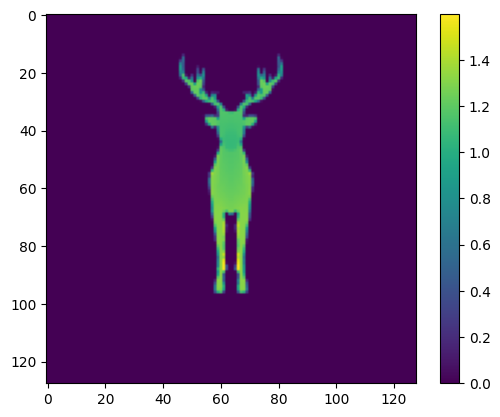

In [7]:
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": objeto,
    "to_world":
      mi.ScalarTransform4f().translate(mi.ScalarPoint3f([0.0, 0.0, 1.4])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

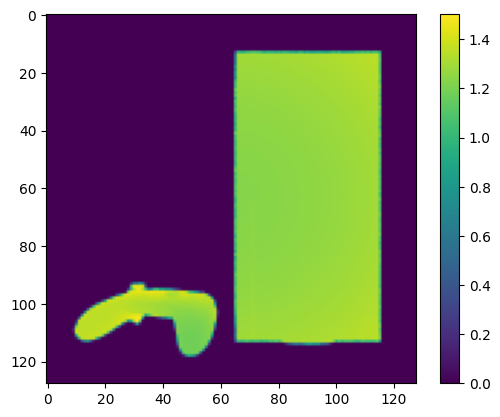

In [ ]:
#@title Obteniendo una vista previa original  de la escena
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().translate(mi.ScalarPoint3f([0.0, 0.0, 1.4])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

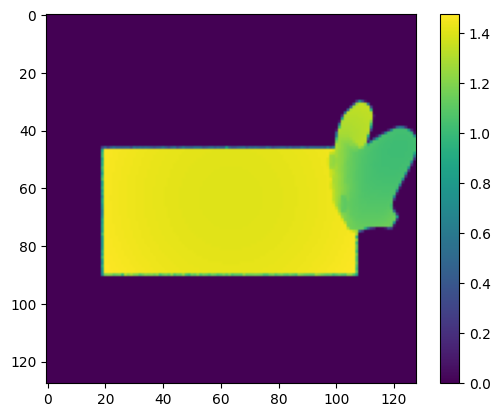

In [ ]:
#@title Obteniendo una vista previa rotación 0° sobre el eje Z
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[1,0,0], angle=90) @ mi.ScalarTransform4f().rotate(axis=[0,0,1], angle=270).translate(mi.ScalarPoint3f([-1.4, 0.0, 0.0])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

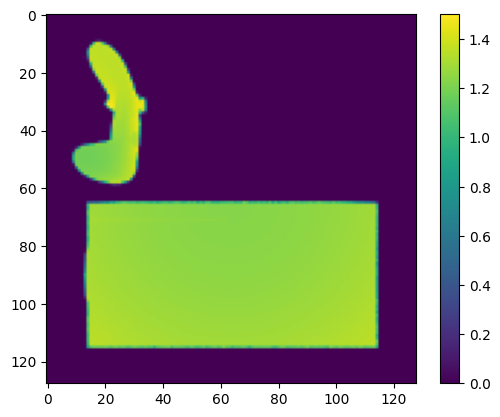

In [ ]:
#@title Obteniendo una vista previa rotación 90° sobre el eje Z
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[0,0,1], angle=90).translate(mi.ScalarPoint3f([0.0, 0.0, 1.4])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

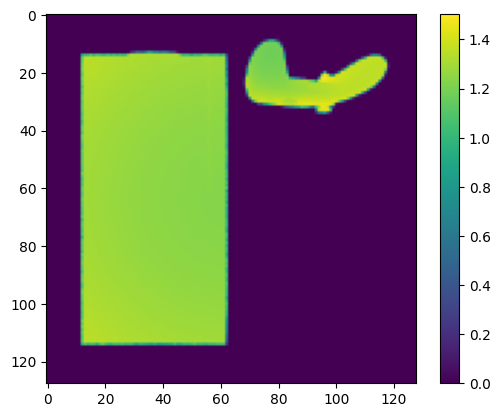

In [ ]:
#@title Obteniendo una vista previa rotación 180° sobre el eje Z
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[0,0,1], angle=180).translate(mi.ScalarPoint3f([0.0, 0.0, 1.4])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

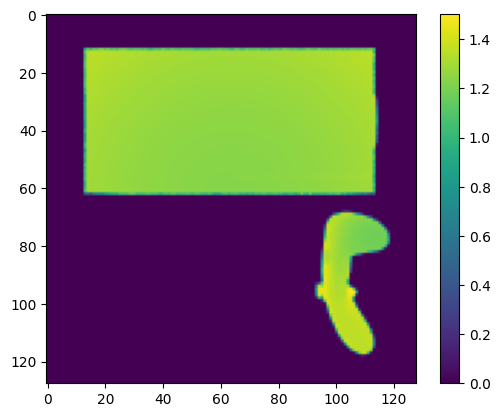

In [ ]:
#@title Obteniendo una vista previa rotación 270° sobre el eje Z
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[0,0,1], angle=270).translate(mi.ScalarPoint3f([0.0, 0.0, 1.4])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

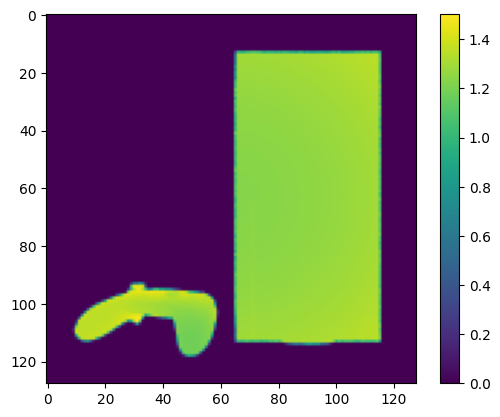

In [ ]:
#@title Obteniendo una vista previa rotación de 0° sobre el eje Y
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[0,1,0], angle=0).translate(mi.ScalarPoint3f([0.0, 0.0, 1.4])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

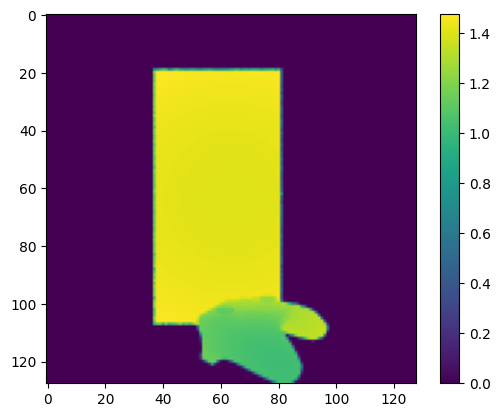

In [ ]:
#@title Obteniendo una vista previa rotación de 90° sobre el eje Y
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[0,1,0], angle=90).translate(mi.ScalarPoint3f([-1.4, 0.0, 0.0])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

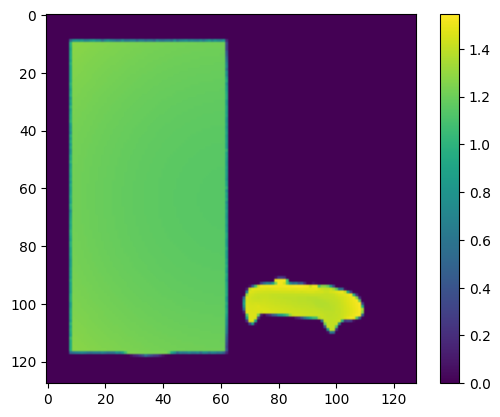

In [ ]:
#@title Obteniendo una vista previa rotación de 180° sobre el eje Y
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[0,1,0], angle=180).translate(mi.ScalarPoint3f([0.0, 0.0, -1.4])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

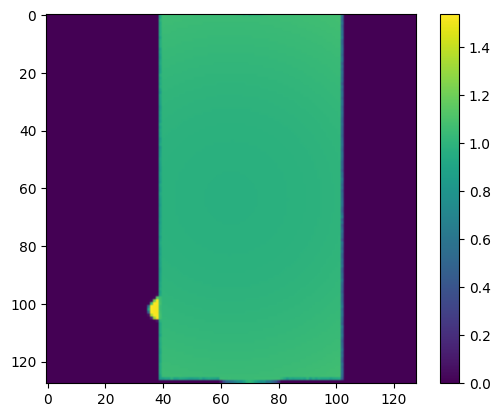

In [ ]:
#@title Obteniendo una vista previa rotación de 270° sobre el eje Y
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[0,1,0], angle=270).translate(mi.ScalarPoint3f([1.4, 0.0, 0.0])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

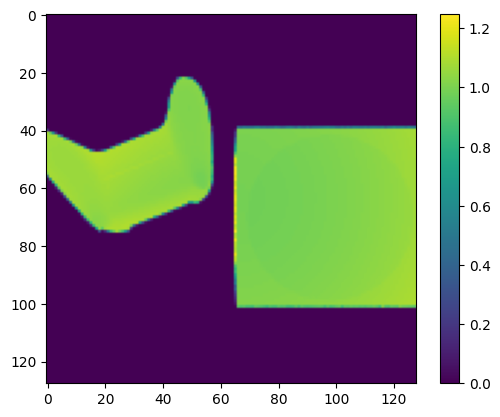

In [ ]:
#@title Obteniendo una vista previa rotación de 90° sobre el eje X
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[1,0,0], angle=90).translate(mi.ScalarPoint3f([0.0, 1.4, 0.0])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

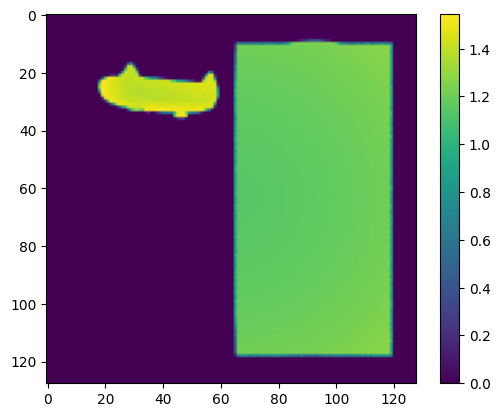

In [ ]:
#@title Obteniendo una vista previa rotación de 180° sobre el eje X
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[1,0,0], angle=180).translate(mi.ScalarPoint3f([0.0, 0.0, -1.4])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()

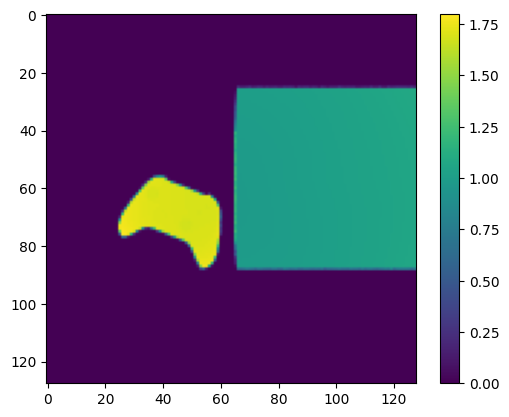

In [ ]:
#@title Obteniendo una vista previa rotación de 270° sobre el eje X
mi.set_variant("scalar_rgb")

preview_scene = mi.load_dict(
{
  "type": "scene",
  "integrator": {
    "type": "aov",
    "aovs": "dd.z:depth"
  },
  "sensor": {
    'type': 'perspective',
    'fov': 45,
    "to_world": mi.ScalarTransform4f().look_at(
        [0, 0, 0.0],
        [0, 0, 1.0],
        [0, 1, 0]
    ),
    "film": {
        "type": "hdrfilm",
        "width": 128,
        "height": 128,
        "rfilter": {"type": "box"},
    },
    "sampler": {"type": "independent", "sample_count": 128}
  },

  "shape": {
    "type": "obj",
    "filename": path,
    "to_world":
      mi.ScalarTransform4f().rotate(axis=[1,0,0], angle=270).translate(mi.ScalarPoint3f([0.0, -1.4, 0.0])),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
  },

  "relay_wall" :{
    "type": "rectangle",
    "to_world": mi.ScalarTransform4f().scale([1.0, 1.0, 1.0]).translate([0.0, 0.0, 0.0]),
    "bsdf": {"type": "diffuse", "reflectance": 1.0}
    }
}
)

if preview_scene is None:
  print("Error: La escena no se cargó correctamente")
else:
  image_preview = mi.render(preview_scene)
  plt.imshow(image_preview)
  plt.colorbar()
  plt.show()